## Gait Video Study
### Vizualizing the permutation feature importance results for best task, subject and cross generalization models 
* This analysis is only done on the predictions for the best task, subject and cross gen models

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pickle
from torchinfo import summary
# %matplotlib widget
import matplotlib.pyplot as plt

import pandas as pd
from mpl_toolkits import mplot3d
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.ticker as ticker
import seaborn as sns
from IPython.display import display
from matplotlib.lines import Line2D

# Task generalization Permutation Importance 
* Best task gen model is MSResnet

In [2]:
#Path for the Task gen Permutation importance results 
task_gen_pi = pd.read_csv('C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\PermImpResults\\WtoWT\\MSResnet\\Permutation_importance_only_main_results.csv', index_col = 0)
#Path for best Task gen model results 
task_gen_best = pd.read_csv('C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\PermImpResults\\WtoWT\\[person_1_best_stride_898]task_gen_msresnet_2021_03_31-06_18_16_636630\\task_generalize_WtoWT_result_metrics.csv', index_col = 0)


In [3]:
task_gen_pi

,right hip_mean,right knee_mean,right ankle_mean,left hip_mean,left knee_mean,left ankle_mean,left toe 1_mean,left toe 2_mean,left heel_mean,right toe 1_mean,...,right ankle_std,left hip_std,left knee_std,left ankle_std,left toe 1_std,left toe 2_std,left heel_std,right toe 1_std,right toe 2_std,right heel_std
stride_accuracy,8.381890e-01,7.586614e-01,8.533465e-01,8.816929e-01,7.675197e-01,8.649606e-01,8.448819e-01,8.255906e-01,7.812992e-01,8.027559e-01,...,0.002509,0.007043,0.008896,0.005180,0.006363,2.244440e-03,0.005840,0.009353,0.002731,0.010938
stride_precision_macro,8.370874e-01,7.599944e-01,8.578825e-01,8.900857e-01,7.731889e-01,8.750939e-01,8.558616e-01,8.529137e-01,8.205706e-01,8.208479e-01,...,0.002359,0.006240,0.009220,0.004309,0.005594,1.375418e-03,0.006190,0.006687,0.003797,0.009329
stride_precision_micro,8.381890e-01,7.586614e-01,8.533465e-01,8.816929e-01,7.675197e-01,8.649606e-01,8.448819e-01,8.255906e-01,7.812992e-01,8.027559e-01,...,0.002509,0.007043,0.008896,0.005180,0.006363,2.244440e-03,0.005840,0.009353,0.002731,0.010938
stride_precision_weighted,8.377897e-01,7.604896e-01,8.588502e-01,8.906481e-01,7.744596e-01,8.757754e-01,8.578158e-01,8.547147e-01,8.229334e-01,8.228600e-01,...,0.002488,0.006138,0.009033,0.004325,0.005563,1.358363e-03,0.006273,0.006615,0.003833,0.009175
stride_precision_class_wise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stride_recall_macro,8.371932e-01,7.594260e-01,8.537335e-01,8.817234e-01,7.672490e-01,8.647240e-01,8.457463e-01,8.266684e-01,7.840880e-01,8.050487e-01,...,0.002463,0.007099,0.009133,0.005184,0.006258,2.232322e-03,0.005785,0.009177,0.002802,0.010738
stride_recall_micro,8.381890e-01,7.586614e-01,8.533465e-01,8.816929e-01,7.675197e-01,8.649606e-01,8.448819e-01,8.255906e-01,7.812992e-01,8.027559e-01,...,0.002509,0.007043,0.008896,0.005180,0.006363,2.244440e-03,0.005840,0.009353,0.002731,0.010938
stride_recall_weighted,8.381890e-01,7.586614e-01,8.533465e-01,8.816929e-01,7.675197e-01,8.649606e-01,8.448819e-01,8.255906e-01,7.812992e-01,8.027559e-01,...,0.002509,0.007043,0.008896,0.005180,0.006363,2.244440e-03,0.005840,0.009353,0.002731,0.010938
stride_recall_class_wise,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stride_F1_macro,8.367910e-01,7.578533e-01,8.537417e-01,8.821323e-01,7.676174e-01,8.651191e-01,8.460223e-01,8.275578e-01,7.827594e-01,8.028446e-01,...,0.002453,0.006983,0.008949,0.005117,0.006372,2.132134e-03,0.006025,0.009401,0.002710,0.010695


In [107]:
#Reducing to only evaluation metrics of interest
features_of_interest = ['stride_accuracy', 'stride_precision_macro', 'stride_recall_macro', 'stride_F1_macro', 'stride_AUC_macro',\
                       'person_accuracy', 'person_precision_macro', 'person_recall_macro', 'person_F1_macro', 'person_AUC_macro']
task_gen_pi_reduced = task_gen_pi.loc[features_of_interest]
task_gen_best_reduced = task_gen_best.loc[features_of_interest]

In [127]:
#Choosing the metric of interest to show results for in task gen
task_gen_metric = "stride_AUC_macro"

#Display name on the plots for the Task gen metric of interest
task_gen_metric_display_name = 'Stride-based AUROC (' + r'$AUC_{str}$' + ')'


In [128]:
task_gen_pi_reduced.columns

Index(['right hip_mean', 'right knee_mean', 'right ankle_mean',
       'left hip_mean', 'left knee_mean', 'left ankle_mean', 'left toe 1_mean',
       'left toe 2_mean', 'left heel_mean', 'right toe 1_mean',
       'right toe 2_mean', 'right heel_mean', 'right hip_std',
       'right knee_std', 'right ankle_std', 'left hip_std', 'left knee_std',
       'left ankle_std', 'left toe 1_std', 'left toe 2_std', 'left heel_std',
       'right toe 1_std', 'right toe 2_std', 'right heel_std'],
      dtype='object')

In [129]:
task_gen_best_reduced

,task_gen_msresnet_
stride_accuracy,0.8986220472440944
stride_precision_macro,0.9027536965684876
stride_recall_macro,0.8982558400229083
stride_F1_macro,0.898723594925627
stride_AUC_macro,0.9748222439822173
person_accuracy,1.0
person_precision_macro,1.0
person_recall_macro,1.0
person_F1_macro,1.0
person_AUC_macro,1.0


In [130]:
#Adding different colors in FI plot for different feature types 
#Hip features - yellow, Knee- blue, Ankle - green, Feet (Left/right-side Big/little toes and heel) - red

#Initial order for the features 
ordered_features = ['right hip', 'left hip', 'right knee', 'left knee', 'right ankle', 'left ankle', 'right toe 1', 'left toe 1', \
                   'right toe 2', 'left toe 2', 'right heel', 'left heel']

#Colors for each group (spatial/temporal/kinetic/spatiotemporal)
colors = ['limegreen', 'limegreen']+ 2*['slateblue']+2*['gold'] + 6*['hotpink']

#To make sure temporal-spatial-spatiotemporal-kinetic feature order is preserved (which is used in the paper)
color_order = [1]*2 + 2*[2] + 2*[3] + 6*[4]

#In permutation importance, we have mean and std of metrics from 20 runs, so we will have to 
#used std to denote the error in the mean from 20 runs 
ordered_features_mean = [i + '_mean' for i in ordered_features]
ordered_features_std = [i + '_std' for i in ordered_features]

color_dic = {ordered_features[i]:colors[i] for i in range(12)}

In [131]:
#Creating the dataframe with metric of interest mean, std and colors as columns for each feature
#Task gen 
task_gen_pi_df = pd.DataFrame(task_gen_pi_reduced.loc[task_gen_metric, ordered_features_mean])
task_gen_pi_df.index = ordered_features
task_gen_pi_df['std'] = task_gen_pi_reduced.loc[task_gen_metric, ordered_features_std].values

#Adding the colors and order of colors of interest
task_gen_pi_df['colors'] = colors
task_gen_pi_df['color_order'] = color_order
#Sorting the task gen PI metric within each group 
task_gen_pi_df = task_gen_pi_df.sort_values(by = ['color_order', task_gen_metric], ascending= False)

In [132]:
#Display names for the features on the plot 
feature_display_names = ['Right hip', 'Left hip', 'Right knee', 'Left knee', 'Right ankle', 
                         'Left ankle', 'Right big toe', 'Left big toe', 'Right little toe', 'Left little toe',
                           'Right heel', 'Left heel']

feature_dic = {ordered_features[i]:feature_display_names[i] for i in range(12)}

In [133]:
task_gen_pi_df

,stride_AUC_macro,std,colors,color_order
right toe 2,0.963340,0.001424,hotpink,4
left toe 2,0.956915,0.001339,hotpink,4
left toe 1,0.953058,0.001782,hotpink,4
right heel,0.948053,0.002422,hotpink,4
right toe 1,0.939384,0.002863,hotpink,4
left heel,0.934079,0.002982,hotpink,4
left ankle,0.963109,0.001566,gold,3
right ankle,0.959581,0.001358,gold,3
left knee,0.913375,0.001572,slateblue,2
right knee,0.900068,0.005361,slateblue,2


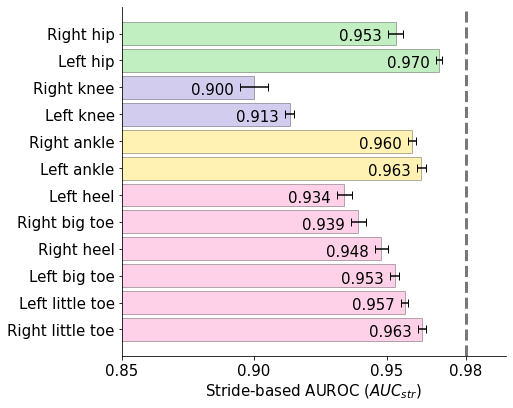

In [223]:
#Plotting Task and Subject gen PI side-by-side 
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
font = {'size'   : 15}
mpl.rc('font', **font)


fig, axes = plt.subplots(1, 1, sharex=False, sharey = False, figsize=(7, 5.5), constrained_layout=True)
# fig.tight_layout()
# sns.despine(offset=0)

'''
#Bar plot for the Task-Gen
sns.barplot(x = task_gen_metric, y = task_gen_pi_df.index, palette= task_gen_pi_df['colors'], linewidth = 0.5, \
                 edgecolor = 'k', ax = axes, xerr = task_gen_pi_df['std']*1, \
            ecolor = 'grey', capstyle='projecting', data=task_gen_pi_df, alpha = 0.6)
#palette= colors_sorted, #use for colored plot
'''

plt.barh(width = task_gen_pi_df[task_gen_metric], height = 0.85, data = task_gen_pi_df, linewidth = 1, \
                 edgecolor = 'k', alpha = 0.3, \
           xerr = task_gen_pi_df['std'], capsize = 4, label = 'Task-Gen',  y= np.array(range(len(task_gen_pi_df.index))))


#Sorting the feature display names by the order of appearance on the plot
feature_display_names_sorted = [feature_dic[x] for x in task_gen_pi_df.index]

#Assigning the grouped color and hatch for separating between task and subject gen results 
for i, bar in enumerate(axes.patches):
    bar.set_facecolor(task_gen_pi_df['colors'][i])
    bar.set_edgecolor = 'k'
        
#Adding the metric of interest as text to the plot
for idx, p in enumerate(axes.patches):
    axes.annotate("%.3f" % p.get_width(), \
                     (p.get_x() + p.get_width()- task_gen_pi_df['std'][idx]-0.005, p.get_y()-0.22),
                xytext=(7, 10), textcoords='offset points', ha = 'right', fontsize = 15)
fig.texts.append(axes.texts.pop())    
    
axes.set_yticks(np.arange(12))
axes.set_yticklabels(feature_display_names_sorted, fontsize = 15)
axes.set_ylim(-1,12)
axes.set_xlim(0.86, 0.995)
axes.set_xlabel(task_gen_metric_display_name, fontsize = 15)
# axes.set_title('Task-Gen', fontsize = 13)
axes.set_xticks([0.85, 0.9, 0.95, 0.98])

#Adding a line showing the best Task-Gen metric in best regress-N model
axes.axvline(x=0.98, color = 'dimgray', alpha = 0.9, linestyle = '--', linewidth = 3)

# plt.title('Feature permutation importance')
# plt.savefig('side_by_side.png', dpi = 250, bbox_inches='tight')
plt.savefig('C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\PermImpResults\\WtoWT\\PI_task_gen_'+ str(task_gen_metric) + '.png', dpi = 250, bbox_inches='tight')
plt.show()

# Subject generalization Permutation Importance 
* Best subject gen W model is ResNet
* Best subject gen WT model is CNN

## Subject gen W

In [53]:
#Path for the Subject gen W Permutation importance results 
pi_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\codes\\PostHocAnalysis\\W\\Resnet1D\\'
subW_gen_pi = pd.read_csv(pi_path + 'Permutation_importance_only_main_results.csv', index_col = 0)

#Path for best Task gen model results 
best_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\SeverityMetrics\\[person_78]current_best_resnet_subject_genW_10May_2021_05_11-14_28_15_251278\\'
subW_gen_best = pd.read_csv(best_path + 'subject_generalize_W_result_metrics.csv', index_col = 0)

In [54]:
subW_gen_pi

,right hip_mean,right knee_mean,right ankle_mean,left hip_mean,left knee_mean,left ankle_mean,left toe 1_mean,left toe 2_mean,left heel_mean,right toe 1_mean,...,right ankle_std,left hip_std,left knee_std,left ankle_std,left toe 1_std,left toe 2_std,left heel_std,right toe 1_std,right toe 2_std,right heel_std
stride_accuracy_mean,0.485802,0.480130,0.494501,0.497019,0.481414,0.482564,0.491969,0.488753,0.485335,0.499197,...,0.004033,0.005317,0.004138,0.004441,0.002869,0.006536,0.006374,0.006097,0.003960,0.007610
stride_precision_macro_mean,0.419626,0.437196,0.470431,0.446638,0.446011,0.456764,0.429525,0.445173,0.446253,0.459561,...,0.036978,0.013423,0.043169,0.022692,0.027782,0.030420,0.007391,0.016231,0.012451,0.038946
stride_precision_micro_mean,0.485802,0.480130,0.494501,0.497019,0.481414,0.482564,0.491969,0.488753,0.485335,0.499197,...,0.004033,0.005317,0.004138,0.004441,0.002869,0.006536,0.006374,0.006097,0.003960,0.007610
stride_precision_weighted_mean,0.444311,0.462109,0.491930,0.465777,0.470306,0.479536,0.455867,0.474270,0.473723,0.478245,...,0.035776,0.011013,0.041783,0.022228,0.027075,0.028230,0.007290,0.012642,0.010759,0.035560
stride_precision_class_wise_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
best_parameters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_parameters,363654.000000,363654.000000,363654.000000,363654.000000,363654.000000,363654.000000,363654.000000,363654.000000,363654.000000,363654.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
trainable_params,363654.000000,363654.000000,363654.000000,363654.000000,363654.000000,363654.000000,363654.000000,363654.000000,363654.000000,363654.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nontrainable_params,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [55]:
#Reducing to only evaluation metrics of interest
features_of_interest = ['stride_accuracy_mean', 'stride_precision_macro_mean', 'stride_recall_macro_mean', 'stride_F1_macro_mean', 'stride_AUC_macro_mean',\
                       'person_accuracy_mean', 'person_precision_macro_mean', 'person_recall_macro_mean', 'person_F1_macro_mean', 'person_AUC_macro_mean']
subW_gen_pi_reduced = subW_gen_pi.loc[features_of_interest]
subW_gen_best_reduced = subW_gen_best.loc[features_of_interest]

In [56]:
subW_gen_pi_reduced

,right hip_mean,right knee_mean,right ankle_mean,left hip_mean,left knee_mean,left ankle_mean,left toe 1_mean,left toe 2_mean,left heel_mean,right toe 1_mean,...,right ankle_std,left hip_std,left knee_std,left ankle_std,left toe 1_std,left toe 2_std,left heel_std,right toe 1_std,right toe 2_std,right heel_std
stride_accuracy_mean,0.485802,0.480130,0.494501,0.497019,0.481414,0.482564,0.491969,0.488753,0.485335,0.499197,...,0.004033,0.005317,0.004138,0.004441,0.002869,0.006536,0.006374,0.006097,0.003960,0.007610
stride_precision_macro_mean,0.419626,0.437196,0.470431,0.446638,0.446011,0.456764,0.429525,0.445173,0.446253,0.459561,...,0.036978,0.013423,0.043169,0.022692,0.027782,0.030420,0.007391,0.016231,0.012451,0.038946
stride_recall_macro_mean,0.374115,0.370643,0.396468,0.387526,0.376289,0.380420,0.381325,0.379885,0.394522,0.388784,...,0.003950,0.005976,0.002862,0.002404,0.003238,0.006262,0.006167,0.005305,0.006615,0.007057
stride_F1_macro_mean,0.323487,0.320992,0.359678,0.341134,0.328895,0.338999,0.332756,0.335741,0.353468,0.341313,...,0.005445,0.007562,0.004762,0.002271,0.004188,0.006747,0.004513,0.007192,0.008372,0.009206
stride_AUC_macro_mean,0.631636,0.631792,0.652704,0.639379,0.630429,0.648502,0.643936,0.635453,0.658514,0.646909,...,0.003035,0.002674,0.004933,0.003879,0.002260,0.005345,0.004419,0.011495,0.003397,0.003727
person_accuracy_mean,0.438095,0.431429,0.439048,0.438095,0.424762,0.418095,0.438095,0.438095,0.437143,0.438095,...,0.021925,0.000000,0.018257,0.018257,0.000000,0.000000,0.002130,0.000000,0.000000,0.014907
person_precision_macro_mean,0.333333,0.328889,0.335556,0.333333,0.324444,0.320000,0.333333,0.333333,0.335556,0.333333,...,0.019876,0.000000,0.012172,0.012172,0.000000,0.000000,0.004969,0.000000,0.000000,0.009938
person_recall_macro_mean,0.146032,0.144698,0.158984,0.146032,0.143365,0.142032,0.146032,0.146032,0.158984,0.146032,...,0.032628,0.000000,0.003651,0.003651,0.000000,0.000000,0.028962,0.000000,0.000000,0.002981
person_F1_macro_mean,0.202222,0.200000,0.209989,0.202222,0.197778,0.195556,0.202222,0.202222,0.209778,0.202222,...,0.023596,0.000000,0.006086,0.006086,0.000000,0.000000,0.016895,0.000000,0.000000,0.004969
person_AUC_macro_mean,0.722778,0.748889,0.796944,0.777500,0.721389,0.750278,0.738889,0.706944,0.773611,0.754167,...,0.037363,0.032176,0.022792,0.025104,0.036812,0.010253,0.026716,0.033736,0.025428,0.035703


In [57]:
subW_gen_pi_reduced[['right ankle_mean', 'right ankle_std']]

,right ankle_mean,right ankle_std
stride_accuracy_mean,0.494501,0.004033
stride_precision_macro_mean,0.470431,0.036978
stride_recall_macro_mean,0.396468,0.003950
stride_F1_macro_mean,0.359678,0.005445
stride_AUC_macro_mean,0.652704,0.003035
person_accuracy_mean,0.439048,0.021925
person_precision_macro_mean,0.335556,0.019876
person_recall_macro_mean,0.158984,0.032628
person_F1_macro_mean,0.209989,0.023596
person_AUC_macro_mean,0.796944,0.037363


In [58]:
subW_gen_best_reduced

,current_best_resnet_subject_genW_10May_
stride_accuracy_mean,0.5132433987621631
stride_precision_macro_mean,0.5016843298497158
stride_recall_macro_mean,0.49457498511899445
stride_F1_macro_mean,0.48112842582867926
stride_AUC_macro_mean,0.67801553546886
person_accuracy_mean,0.7809523809523811
person_precision_macro_mean,0.7888888888888889
person_recall_macro_mean,0.7666666666666666
person_F1_macro_mean,0.7577777777777779
person_AUC_macro_mean,0.8305555555555555


In [59]:
#Choosing the metric of interest to show results for in task gen
subW_gen_metric = "person_AUC_macro_mean"

#Display name on the plots for the Task gen metric of interest
subW_gen_metric_display_name = 'Subject-based AUROC (' + r'$AUC_{sub}$' + ')'


In [60]:
subW_gen_pi_reduced.columns

Index(['right hip_mean', 'right knee_mean', 'right ankle_mean',
       'left hip_mean', 'left knee_mean', 'left ankle_mean', 'left toe 1_mean',
       'left toe 2_mean', 'left heel_mean', 'right toe 1_mean',
       'right toe 2_mean', 'right heel_mean', 'right hip_std',
       'right knee_std', 'right ankle_std', 'left hip_std', 'left knee_std',
       'left ankle_std', 'left toe 1_std', 'left toe 2_std', 'left heel_std',
       'right toe 1_std', 'right toe 2_std', 'right heel_std'],
      dtype='object')

In [61]:
subW_gen_best_reduced

,current_best_resnet_subject_genW_10May_
stride_accuracy_mean,0.5132433987621631
stride_precision_macro_mean,0.5016843298497158
stride_recall_macro_mean,0.49457498511899445
stride_F1_macro_mean,0.48112842582867926
stride_AUC_macro_mean,0.67801553546886
person_accuracy_mean,0.7809523809523811
person_precision_macro_mean,0.7888888888888889
person_recall_macro_mean,0.7666666666666666
person_F1_macro_mean,0.7577777777777779
person_AUC_macro_mean,0.8305555555555555


In [62]:
#Adding different colors in FI plot for different feature types 
#Hip features - yellow, Knee- blue, Ankle - green, Feet (Left/right-side Big/little toes and heel) - red

#Initial order for the features 
ordered_features = ['right hip', 'left hip', 'right knee', 'left knee', 'right ankle', 'left ankle', 'right toe 1', 'left toe 1', \
                   'right toe 2', 'left toe 2', 'right heel', 'left heel']

#Colors for each group (spatial/temporal/kinetic/spatiotemporal)
colors = ['limegreen', 'limegreen']+ 2*['slateblue']+2*['gold'] + 6*['hotpink']

#To make sure temporal-spatial-spatiotemporal-kinetic feature order is preserved (which is used in the paper)
color_order = [1]*2 + 2*[2] + 2*[3] + 6*[4]

#In permutation importance, we have mean and std of metrics from 20 runs, so we will have to 
#used std to denote the error in the mean from 20 runs 
ordered_features_mean = [i + '_mean' for i in ordered_features]
ordered_features_std = [i + '_std' for i in ordered_features]

color_dic = {ordered_features[i]:colors[i] for i in range(12)}

In [63]:
#Creating the dataframe with metric of interest mean, std and colors as columns for each feature
#Task gen 
subW_gen_pi_df = pd.DataFrame(subW_gen_pi_reduced.loc[subW_gen_metric, ordered_features_mean])
subW_gen_pi_df.index = ordered_features
subW_gen_pi_df['std'] = subW_gen_pi_reduced.loc[subW_gen_metric, ordered_features_std].values

#Adding the colors and order of colors of interest
subW_gen_pi_df['colors'] = colors
subW_gen_pi_df['color_order'] = color_order
#Sorting the task gen PI metric within each group 
subW_gen_pi_df = subW_gen_pi_df.sort_values(by = ['color_order', subW_gen_metric], ascending= False)

In [64]:
#Display names for the features on the plot 
feature_display_names = ['Right hip', 'Left hip', 'Right knee', 'Left knee', 'Right ankle', 
                         'Left ankle', 'Right big toe', 'Left big toe', 'Right little toe', 'Left little toe',
                           'Right heel', 'Left heel']

feature_dic = {ordered_features[i]:feature_display_names[i] for i in range(12)}

In [65]:
subW_gen_pi_df

,person_AUC_macro_mean,std,colors,color_order
left heel,0.773611,0.026716,hotpink,4
right toe 1,0.754167,0.033736,hotpink,4
right heel,0.742500,0.035703,hotpink,4
left toe 1,0.738889,0.036812,hotpink,4
right toe 2,0.737778,0.025428,hotpink,4
left toe 2,0.706944,0.010253,hotpink,4
right ankle,0.796944,0.037363,gold,3
left ankle,0.750278,0.025104,gold,3
right knee,0.748889,0.039679,slateblue,2
left knee,0.721389,0.022792,slateblue,2


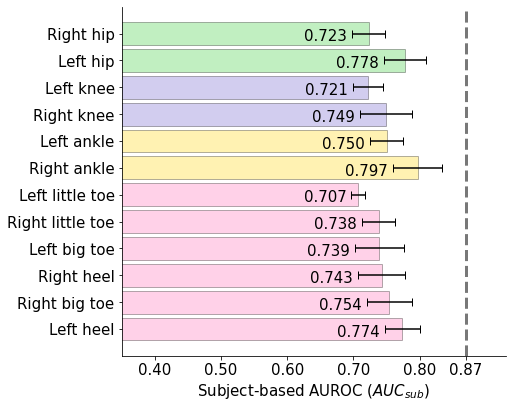

In [66]:
#Plotting Task and Subject gen PI side-by-side 
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
font = {'size'   : 15}
mpl.rc('font', **font)


fig, axes = plt.subplots(1, 1, sharex=False, sharey = False, figsize=(7, 5.5), constrained_layout=True)
# fig.tight_layout()
# sns.despine(offset=0)

'''
#Bar plot for the Task-Gen
sns.barplot(x = task_gen_metric, y = task_gen_pi_df.index, palette= task_gen_pi_df['colors'], linewidth = 0.5, \
                 edgecolor = 'k', ax = axes, xerr = task_gen_pi_df['std']*1, \
            ecolor = 'grey', capstyle='projecting', data=task_gen_pi_df, alpha = 0.6)
#palette= colors_sorted, #use for colored plot
'''

plt.barh(width = subW_gen_pi_df[subW_gen_metric], height = 0.85, data = subW_gen_pi_df, linewidth = 1, \
                 edgecolor = 'k', alpha = 0.3, \
           xerr = subW_gen_pi_df['std'], capsize = 4, label = 'Subject-Gen (W)',  y= np.array(range(len(subW_gen_pi_df.index))))


#Sorting the feature display names by the order of appearance on the plot
feature_display_names_sorted = [feature_dic[x] for x in subW_gen_pi_df.index]

#Assigning the grouped color and hatch for separating between task and subject gen results 
for i, bar in enumerate(axes.patches):
    bar.set_facecolor(subW_gen_pi_df['colors'][i])
    bar.set_edgecolor = 'k'
        
#Adding the metric of interest as text to the plot
for idx, p in enumerate(axes.patches):
    axes.annotate("%.3f" % p.get_width(), \
                     (p.get_x() + p.get_width()- subW_gen_pi_df['std'][idx]-0.018, p.get_y()-0.22),
                xytext=(7, 10), textcoords='offset points', ha = 'right', fontsize = 15)
fig.texts.append(axes.texts.pop())    
    
axes.set_yticks(np.arange(12))
axes.set_yticklabels(feature_display_names_sorted, fontsize = 15)
axes.set_ylim(-1,12)
axes.set_xlim(0.35, 0.93)
axes.set_xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.87])
axes.set_xlabel(subW_gen_metric_display_name, fontsize = 15)
# axes.set_title('Task-Gen', fontsize = 13)

#Adding a line showing the best Task-Gen metric in best regress-N model
axes.axvline(x=0.87, color = 'dimgray', alpha = 0.9, linestyle = '--', linewidth = 3)
# axes.set_xticks(list(axes.get_xticks()) + [0.93])

# plt.title('Feature permutation importance')
# plt.savefig('side_by_side.png', dpi = 250, bbox_inches='tight')
plt.savefig('C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\PermImpResults\\PI_subW_gen_' + str(subW_gen_metric) + '.png', dpi = 250, bbox_inches='tight')
plt.show()

## Subject gen WT

In [67]:
#Subject gen WT
#Path for the Subject gen W Permutation importance results 
pi_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\codes\\PostHocAnalysis\\PermImpResults_ThirdFloor\\WT\\CNN1D\\'
subWT_gen_pi = pd.read_csv(pi_path + 'Permutation_importance_only_main_results.csv', index_col = 0)

#Path for best Task gen model results 
best_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\SeverityMetrics\\subjectgenwtbestmodel75computer16\\'
subWT_gen_best = pd.read_csv(best_path + 'subject_generalize_WT_result_metrics.csv', index_col = 0)

In [68]:
subWT_gen_pi

,right hip_mean,right knee_mean,right ankle_mean,left hip_mean,left knee_mean,left ankle_mean,left toe 1_mean,left toe 2_mean,left heel_mean,right toe 1_mean,...,right ankle_std,left hip_std,left knee_std,left ankle_std,left toe 1_std,left toe 2_std,left heel_std,right toe 1_std,right toe 2_std,right heel_std
stride_accuracy_mean,0.399242,0.362241,0.400793,0.417158,0.392146,0.405151,0.412130,0.396648,0.408066,0.404339,...,0.005948,0.009898,0.004753,0.004633,0.004083,0.003028,0.006787,0.003918,0.008807,0.004798
stride_precision_macro_mean,0.445699,0.358303,0.449889,0.461655,0.455285,0.457437,0.463859,0.434449,0.461962,0.462928,...,0.014631,0.011986,0.030419,0.010170,0.008979,0.006454,0.011305,0.009630,0.006268,0.020009
stride_precision_micro_mean,0.399242,0.362241,0.400793,0.417158,0.392146,0.405151,0.412130,0.396648,0.408066,0.404339,...,0.005948,0.009898,0.004753,0.004633,0.004083,0.003028,0.006787,0.003918,0.008807,0.004798
stride_precision_weighted_mean,0.457385,0.361962,0.460115,0.465223,0.470104,0.462578,0.479399,0.445663,0.473954,0.473957,...,0.015966,0.011077,0.041437,0.012816,0.013009,0.007808,0.010375,0.009259,0.006932,0.019472
stride_precision_class_wise_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
best_parameters,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_parameters,86325.000000,86325.000000,86325.000000,86325.000000,86325.000000,86325.000000,86325.000000,86325.000000,86325.000000,86325.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
trainable_params,86325.000000,86325.000000,86325.000000,86325.000000,86325.000000,86325.000000,86325.000000,86325.000000,86325.000000,86325.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nontrainable_params,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [69]:
pi_all_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\codes\\PostHocAnalysis\\PermImpResults_ThirdFloor\\WT\\CNN1D\\'
subWT_gen_pi_all = pd.read_csv(pi_all_path + 'Permutation_importance_all_results.csv', index_col = 0)


In [70]:
subWT_gen_pi_all

,right hip_0,right hip_1,right hip_2,right hip_3,right hip_4,right hip_mean,right hip_std,right knee_0,right knee_1,right knee_2,...,right toe 2_4,right toe 2_mean,right toe 2_std,right heel_0,right heel_1,right heel_2,right heel_3,right heel_4,right heel_mean,right heel_std
stride_accuracy_mean,0.4044757733727942,0.40408267767369976,0.3931603063962402,0.39863742778706646,0.3958529616801983,0.399242,0.004992,0.36537080481939166,0.36773420976974047,0.35569529679614287,...,0.3903492588996502,0.391814,0.008807,0.39947313056242184,0.40317104889863264,0.3947230536448065,0.40617087084721015,0.40575200512564413,0.401858,0.004798
stride_precision_macro_mean,0.482303287023255,0.4465783874695073,0.4313597002232748,0.43386448116874954,0.43438763279763953,0.445699,0.021297,0.3771298361846382,0.3570977567487643,0.34183148055744705,...,0.4106011409633282,0.420321,0.006268,0.4394112095619086,0.489698647674632,0.45720766083866515,0.44302588710401014,0.451427251330471,0.456154,0.020009
stride_precision_micro_mean,0.4044757733727942,0.40408267767369976,0.3931603063962402,0.39863742778706646,0.3958529616801983,0.399242,0.004992,0.36537080481939166,0.36773420976974047,0.35569529679614287,...,0.3903492588996502,0.391814,0.008807,0.39947313056242184,0.40317104889863264,0.3947230536448065,0.40617087084721015,0.40575200512564413,0.401858,0.004798
stride_precision_weighted_mean,0.5010718632627358,0.4592941219557168,0.4371261990698471,0.4424127378384918,0.4470212480966079,0.457385,0.025759,0.3780958783072851,0.36186836136358835,0.3451427987117176,...,0.4175549420075807,0.428945,0.006932,0.44893975240619677,0.4969426679200132,0.4585785780922878,0.4518132092609746,0.4582846241947318,0.462912,0.019472
stride_precision_class_wise_mean,"[0.5245421245421246, 0.40275048102328787, 0.51...","[0.4987088274044796, 0.4059922868138593, 0.435...","[0.5146273291925466, 0.39218372642934646, 0.38...","[0.5046053183457764, 0.40070334610973596, 0.39...","[0.4690893901420217, 0.39749817881842475, 0.43...",NaN,NaN,"[0.45293501048218027, 0.3917037977916221, 0.28...","[0.40763093116034294, 0.40659123599832586, 0.2...","[0.3590987983978638, 0.3928880981879849, 0.273...",...,"[0.47997648902821316, 0.3969751642392042, 0.35...",NaN,NaN,"[0.5123671497584541, 0.3943130415538173, 0.411...","[0.6178265204386839, 0.3952495652495652, 0.456...","[0.605743879472693, 0.38360351699413164, 0.382...","[0.5259649122807017, 0.40085657485713416, 0.40...","[0.5473622782446312, 0.3963549706322346, 0.410...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
best_parameters,"{'net__batch_size': 128, 'net__callbacks__Earl...","{'net__batch_size': 128, 'net__callbacks__Earl...","{'net__batch_size': 128, 'net__callbacks__Earl...","{'net__batch_size': 128, 'net__callbacks__Earl...","{'net__batch_size': 128, 'net__callbacks__Earl...",NaN,NaN,"{'net__batch_size': 128, 'net__callbacks__Earl...","{'net__batch_size': 128, 'net__callbacks__Earl...","{'net__batch_size': 128, 'net__callbacks__Earl...",...,"{'net__batch_size': 128, 'net__callbacks__Earl...",NaN,NaN,"{'net__batch_size': 128, 'net__callbacks__Earl...","{'net__batch_size': 128, 'net__callbacks__Earl...","{'net__batch_size': 128, 'net__callbacks__Earl...","{'net__batch_size': 128, 'net__callbacks__Earl...","{'net__batch_size': 128, 'net__callbacks__Earl...",NaN,NaN
total_parameters,86325,86325,86325,86325,86325,86325.000000,0.000000,86325,86325,86325,...,86325,86325.000000,0.000000,86325,86325,86325,86325,86325,86325.000000,0.000000
trainable_params,86325,86325,86325,86325,86325,86325.000000,0.000000,86325,86325,86325,...,86325,86325.000000,0.000000,86325,86325,86325,86325,86325,86325.000000,0.000000
nontrainable_params,0,0,0,0,0,0.000000,0.000000,0,0,0,...,0,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000


In [71]:
#Reducing to only evaluation metrics of interest
features_of_interest = ['stride_accuracy_mean', 'stride_precision_macro_mean', 'stride_recall_macro_mean', 'stride_F1_macro_mean', 'stride_AUC_macro_mean',\
                       'person_accuracy_mean', 'person_precision_macro_mean', 'person_recall_macro_mean', 'person_F1_macro_mean', 'person_AUC_macro_mean']
subWT_gen_pi_reduced = subWT_gen_pi.loc[features_of_interest]
subWT_gen_best_reduced = subWT_gen_best.loc[features_of_interest]

In [72]:
subWT_gen_pi_reduced

,right hip_mean,right knee_mean,right ankle_mean,left hip_mean,left knee_mean,left ankle_mean,left toe 1_mean,left toe 2_mean,left heel_mean,right toe 1_mean,...,right ankle_std,left hip_std,left knee_std,left ankle_std,left toe 1_std,left toe 2_std,left heel_std,right toe 1_std,right toe 2_std,right heel_std
stride_accuracy_mean,0.399242,0.362241,0.400793,0.417158,0.392146,0.405151,0.412130,0.396648,0.408066,0.404339,...,0.005948,0.009898,0.004753,0.004633,0.004083,0.003028,0.006787,0.003918,0.008807,0.004798
stride_precision_macro_mean,0.445699,0.358303,0.449889,0.461655,0.455285,0.457437,0.463859,0.434449,0.461962,0.462928,...,0.014631,0.011986,0.030419,0.010170,0.008979,0.006454,0.011305,0.009630,0.006268,0.020009
stride_recall_macro_mean,0.407788,0.373177,0.410432,0.428290,0.401470,0.417333,0.420205,0.404663,0.416830,0.413721,...,0.006154,0.010062,0.005067,0.004568,0.004717,0.002481,0.006973,0.003851,0.008815,0.004823
stride_F1_macro_mean,0.346022,0.298427,0.340950,0.364696,0.328124,0.353545,0.360039,0.347185,0.359056,0.341062,...,0.006435,0.011807,0.005676,0.005798,0.005795,0.003965,0.004822,0.004335,0.009785,0.004902
stride_AUC_macro_mean,0.612416,0.572583,0.649060,0.658939,0.627237,0.644813,0.628261,0.623418,0.638156,0.644542,...,0.003243,0.005605,0.004881,0.002657,0.004074,0.002888,0.001531,0.001212,0.002925,0.005328
person_accuracy_mean,0.456667,0.370000,0.463333,0.450000,0.443333,0.456667,0.436667,0.416667,0.496667,0.430000,...,0.018257,0.023570,0.027889,0.027889,0.018257,0.033333,0.029814,0.018257,0.018257,0.018257
person_precision_macro_mean,0.440000,0.353333,0.446667,0.433333,0.426667,0.440000,0.420000,0.400000,0.480000,0.413333,...,0.018257,0.023570,0.027889,0.027889,0.018257,0.033333,0.029814,0.018257,0.018257,0.018257
person_recall_macro_mean,0.324667,0.198222,0.347778,0.305556,0.263778,0.325556,0.303333,0.267333,0.387778,0.289111,...,0.006086,0.039752,0.061912,0.030591,0.054772,0.071274,0.051878,0.050884,0.018257,0.054772
person_F1_macro_mean,0.330921,0.231746,0.341651,0.320762,0.297968,0.329524,0.306984,0.280000,0.382413,0.297143,...,0.017040,0.028692,0.042663,0.029470,0.030429,0.047751,0.037791,0.029384,0.018257,0.030429
person_AUC_macro_mean,0.675000,0.613333,0.767500,0.751667,0.771667,0.730000,0.749167,0.705833,0.760000,0.780000,...,0.017776,0.009129,0.017280,0.028013,0.038006,0.016029,0.021570,0.020069,0.036084,0.043541


In [73]:
0.675+0.03

0.7050000000000001

In [74]:
subWT_gen_pi_reduced.loc['person_AUC_macro_mean']

right hip_mean      0.675000
right knee_mean     0.613333
right ankle_mean    0.767500
left hip_mean       0.751667
left knee_mean      0.771667
left ankle_mean     0.730000
left toe 1_mean     0.749167
left toe 2_mean     0.705833
left heel_mean      0.760000
right toe 1_mean    0.780000
right toe 2_mean    0.679167
right heel_mean     0.705000
right hip_std       0.036681
right knee_std      0.036132
right ankle_std     0.017776
left hip_std        0.009129
left knee_std       0.017280
left ankle_std      0.028013
left toe 1_std      0.038006
left toe 2_std      0.016029
left heel_std       0.021570
right toe 1_std     0.020069
right toe 2_std     0.036084
right heel_std      0.043541
Name: person_AUC_macro_mean, dtype: float64

In [75]:
subWT_gen_best_reduced

,subject_gen_CNN1D_WT_
stride_accuracy_mean,0.4863264731108899
stride_precision_macro_mean,0.4786622857076144
stride_recall_macro_mean,0.4879391820861974
stride_F1_macro_mean,0.4704754978777352
stride_AUC_macro_mean,0.6634003559519768
person_accuracy_mean,0.75
person_precision_macro_mean,0.7666666666666666
person_recall_macro_mean,0.711111111111111
person_F1_macro_mean,0.7066666666666667
person_AUC_macro_mean,0.7708333333333333


In [76]:
#Choosing the metric of interest to show results for in task gen
subWT_gen_metric = "person_AUC_macro_mean"

#Display name on the plots for the Task gen metric of interest
subWT_gen_metric_display_name = 'Subject-based AUROC (' + r'$AUC_{sub}$' + ')'


In [77]:
subWT_gen_pi_reduced.columns

Index(['right hip_mean', 'right knee_mean', 'right ankle_mean',
       'left hip_mean', 'left knee_mean', 'left ankle_mean', 'left toe 1_mean',
       'left toe 2_mean', 'left heel_mean', 'right toe 1_mean',
       'right toe 2_mean', 'right heel_mean', 'right hip_std',
       'right knee_std', 'right ankle_std', 'left hip_std', 'left knee_std',
       'left ankle_std', 'left toe 1_std', 'left toe 2_std', 'left heel_std',
       'right toe 1_std', 'right toe 2_std', 'right heel_std'],
      dtype='object')

In [78]:
#Adding different colors in FI plot for different feature types 
#Hip features - yellow, Knee- blue, Ankle - green, Feet (Left/right-side Big/little toes and heel) - red

#Initial order for the features 
ordered_features = ['right hip', 'left hip', 'right knee', 'left knee', 'right ankle', 'left ankle', 'right toe 1', 'left toe 1', \
                   'right toe 2', 'left toe 2', 'right heel', 'left heel']

#Colors for each group (spatial/temporal/kinetic/spatiotemporal)
colors = ['limegreen', 'limegreen']+ 2*['slateblue']+2*['gold'] + 6*['hotpink']

#To make sure temporal-spatial-spatiotemporal-kinetic feature order is preserved (which is used in the paper)
color_order = [1]*2 + 2*[2] + 2*[3] + 6*[4]

#In permutation importance, we have mean and std of metrics from 20 runs, so we will have to 
#used std to denote the error in the mean from 20 runs 
ordered_features_mean = [i + '_mean' for i in ordered_features]
ordered_features_std = [i + '_std' for i in ordered_features]

color_dic = {ordered_features[i]:colors[i] for i in range(12)}

In [79]:
#Creating the dataframe with metric of interest mean, std and colors as columns for each feature
#Task gen 
subWT_gen_pi_df = pd.DataFrame(subWT_gen_pi_reduced.loc[subWT_gen_metric, ordered_features_mean])
subWT_gen_pi_df.index = ordered_features
subWT_gen_pi_df['std'] = subWT_gen_pi_reduced.loc[subWT_gen_metric, ordered_features_std].values

#Adding the colors and order of colors of interest
subWT_gen_pi_df['colors'] = colors
subWT_gen_pi_df['color_order'] = color_order
#Sorting the task gen PI metric within each group 
subWT_gen_pi_df = subWT_gen_pi_df.sort_values(by = ['color_order', subWT_gen_metric], ascending= False)

In [80]:
#Display names for the features on the plot 
feature_display_names = ['Right hip', 'Left hip', 'Right knee', 'Left knee', 'Right ankle', 
                         'Left ankle', 'Right big toe', 'Left big toe', 'Right little toe', 'Left little toe',
                           'Right heel', 'Left heel']

feature_dic = {ordered_features[i]:feature_display_names[i] for i in range(12)}

In [81]:
subWT_gen_pi_df[subWT_gen_metric][subWT_gen_pi_df[subWT_gen_metric]>0.77] = 0.770

C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


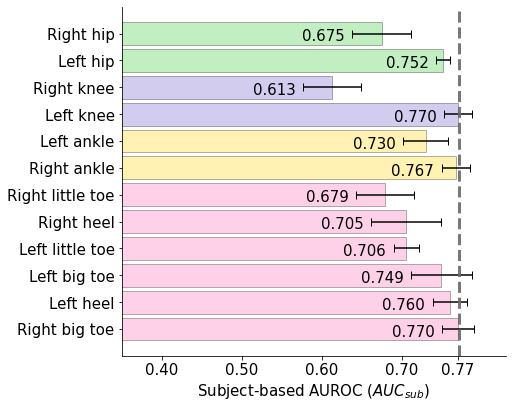

In [82]:
#Plotting Task and Subject gen PI side-by-side 
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
font = {'size'   : 15}
mpl.rc('font', **font)


fig, axes = plt.subplots(1, 1, sharex=False, sharey = False, figsize=(7, 5.5), constrained_layout=True)
# fig.tight_layout()
# sns.despine(offset=0)

'''
#Bar plot for the Task-Gen
sns.barplot(x = task_gen_metric, y = task_gen_pi_df.index, palette= task_gen_pi_df['colors'], linewidth = 0.5, \
                 edgecolor = 'k', ax = axes, xerr = task_gen_pi_df['std']*1, \
            ecolor = 'grey', capstyle='projecting', data=task_gen_pi_df, alpha = 0.6)
#palette= colors_sorted, #use for colored plot
'''

plt.barh(width = subWT_gen_pi_df[subWT_gen_metric], height = 0.85, data = subWT_gen_pi_df, linewidth = 1, \
                 edgecolor = 'k', alpha = 0.3, \
           xerr = subWT_gen_pi_df['std'], capsize = 4, label = 'Subject-Gen (WT)',  y= np.array(range(len(subWT_gen_pi_df.index))))


#Sorting the feature display names by the order of appearance on the plot
feature_display_names_sorted = [feature_dic[x] for x in subWT_gen_pi_df.index]

#Assigning the grouped color and hatch for separating between task and subject gen results 
for i, bar in enumerate(axes.patches):
    bar.set_facecolor(subWT_gen_pi_df['colors'][i])
    bar.set_edgecolor = 'k'
        
#Adding the metric of interest as text to the plot
for idx, p in enumerate(axes.patches):
    axes.annotate("%.3f" % p.get_width(), \
                     (p.get_x() + p.get_width()- subWT_gen_pi_df['std'][idx]-0.018, p.get_y()-0.22),
                xytext=(7, 10), textcoords='offset points', ha = 'right', fontsize = 15)
fig.texts.append(axes.texts.pop())    
    
axes.set_yticks(np.arange(12))
axes.set_yticklabels(feature_display_names_sorted, fontsize = 15)
axes.set_ylim(-1,12)
axes.set_xlim(0.35, 0.83)
axes.set_xticks([0.4, 0.5, 0.6, 0.7, 0.77])
axes.set_xlabel(subWT_gen_metric_display_name, fontsize = 15)
# axes.set_title('Task-Gen', fontsize = 13)

#Adding a line showing the best Task-Gen metric in best regress-N model
axes.axvline(x=0.771, color = 'dimgray', alpha = 0.9, linestyle = '--', linewidth = 3)
# axes.set_xticks(list(axes.get_xticks()) + [0.93])

# plt.title('Feature permutation importance')
# plt.savefig('side_by_side.png', dpi = 250, bbox_inches='tight')
plt.savefig('C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\PermImpResults\\PI_subWT_gen_' + str(subWT_gen_metric) + '.png', dpi = 250, bbox_inches='tight')
plt.show()

## Subject gen W and WT on same plot

In [140]:
# import copy 
# subWT_gen_pi_df = copy.deepcopy(subW_gen_pi_df)
# subWT_gen_metric = copy.deepcopy(subW_gen_metric)
# subWT_gen_metric_display_name = copy.deepcopy(subW_gen_metric_display_name)



In [84]:
concat_W_WT

,person_AUC_macro_mean,std,colors,color_order
left heel,0.773611,0.026716,hotpink,4
right toe 1,0.754167,0.033736,hotpink,4
right heel,0.742500,0.035703,hotpink,4
left toe 1,0.738889,0.036812,hotpink,4
right toe 2,0.737778,0.025428,hotpink,4
left toe 2,0.706944,0.010253,hotpink,4
right ankle,0.796944,0.037363,gold,3
left ankle,0.750278,0.025104,gold,3
right knee,0.748889,0.039679,slateblue,2
left knee,0.721389,0.022792,slateblue,2


In [85]:
feature_display_names_sorted

['Right big toe',
 'Left heel',
 'Left big toe',
 'Left little toe',
 'Right heel',
 'Right little toe',
 'Right ankle',
 'Left ankle',
 'Left knee',
 'Right knee',
 'Left hip',
 'Right hip']

In [86]:
np.arange(12)*2+0.5

array([ 0.5,  2.5,  4.5,  6.5,  8.5, 10.5, 12.5, 14.5, 16.5, 18.5, 20.5,
       22.5])

In [130]:
subW_gen_pi_df

,person_AUC_macro_mean,std,colors,color_order
left heel,0.773611,0.026716,hotpink,4
right toe 1,0.754167,0.033736,hotpink,4
right heel,0.742500,0.035703,hotpink,4
left toe 1,0.738889,0.036812,hotpink,4
right toe 2,0.737778,0.025428,hotpink,4
left toe 2,0.706944,0.010253,hotpink,4
right ankle,0.796944,0.037363,gold,3
left ankle,0.750278,0.025104,gold,3
right knee,0.748889,0.039679,slateblue,2
left knee,0.721389,0.022792,slateblue,2


In [134]:
subW_gen_pi_df.index

Index(['left heel', 'right toe 1', 'right heel', 'left toe 1', 'right toe 2',
       'left toe 2', 'right ankle', 'left ankle', 'right knee', 'left knee',
       'left hip', 'right hip'],
      dtype='object')

In [138]:
subWT_gen_pi_df

,person_AUC_macro_mean,std,colors,color_order
right toe 1,0.770000,0.020069,hotpink,4
left heel,0.760000,0.021570,hotpink,4
left toe 1,0.749167,0.038006,hotpink,4
left toe 2,0.705833,0.016029,hotpink,4
right heel,0.705000,0.043541,hotpink,4
right toe 2,0.679167,0.036084,hotpink,4
right ankle,0.767500,0.017776,gold,3
left ankle,0.730000,0.028013,gold,3
left knee,0.770000,0.017280,slateblue,2
right knee,0.613333,0.036132,slateblue,2


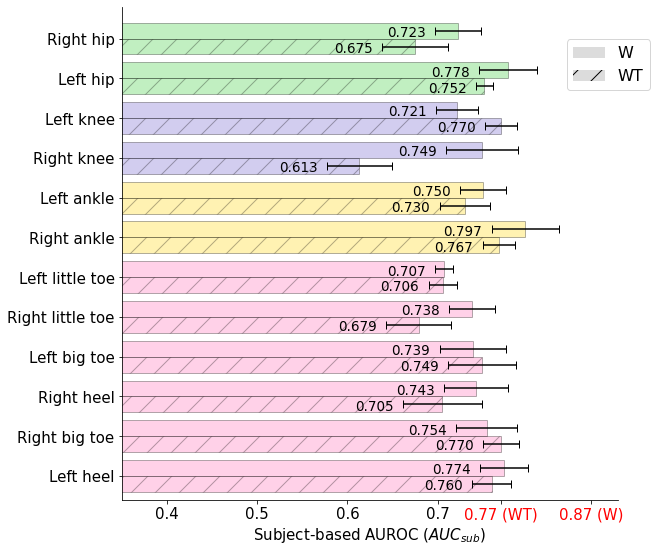

In [141]:
subWT_gen_pi_df= subWT_gen_pi_df.reindex(subW_gen_pi_df.index)
# subWT_gen_pi_df.columns = subWT_gen_pi_df.columns+'_wt'
concat_W_WT = pd.concat((subW_gen_pi_df, subWT_gen_pi_df), axis = 0)

#Plotting Task and Subject gen PI side-by-side 
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
font = {'size'   : 15}
mpl.rc('font', **font)


fig, axes = plt.subplots(1, 1, sharex=False, sharey = False, figsize=(9, 7.5), constrained_layout=True)
# fig.tight_layout()
# sns.despine(offset=0)

'''
#Bar plot for the Task-Gen
sns.barplot(x = task_gen_metric, y = task_gen_pi_df.index, palette= task_gen_pi_df['colors'], linewidth = 0.5, \
                 edgecolor = 'k', ax = axes, xerr = task_gen_pi_df['std']*1, \
            ecolor = 'grey', capstyle='projecting', data=task_gen_pi_df, alpha = 0.6)
#palette= colors_sorted, #use for colored plot
'''
y2 = np.array(range(len(subWT_gen_pi_df.index)))*2.5
y1 = y2+1
plt.barh(width = subW_gen_pi_df[subW_gen_metric], height = 1, data = subW_gen_pi_df, linewidth = 1, \
                 edgecolor = 'k', alpha = 0.3, \
           xerr = subW_gen_pi_df['std'], capsize = 4, label = 'Subject-Gen (W)',  y= y1)


plt.barh(width = subWT_gen_pi_df[subWT_gen_metric], height = 1, data = subWT_gen_pi_df, linewidth = 1, \
                 edgecolor = 'k', alpha = 0.3, \
           xerr = subWT_gen_pi_df['std'], capsize = 4, label = 'Subject-Gen (WT)',  y= y2, hatch = '/')


#Sorting the feature display names by the order of appearance on the plot
feature_display_names_sorted = [feature_dic[x] for x in subW_gen_pi_df.index]

#Assigning the grouped color and hatch for separating between task and subject gen results 
for i, bar in enumerate(axes.patches):
    bar.set_facecolor(concat_W_WT['colors'][i])
    bar.set_edgecolor = 'k'
        
#Adding the metric of interest as text to the plot
for idx, p in enumerate(axes.patches):
    axes.annotate("%.3f" % p.get_width(), \
                     (p.get_x() + p.get_width()- concat_W_WT['std'][idx]-0.018, p.get_y()-0.5),
                xytext=(7, 10), textcoords='offset points', ha = 'right', fontsize = 13.5)
fig.texts.append(axes.texts.pop())    
    
axes.set_yticks(np.arange(12)*2.5+0.5)
axes.set_yticklabels(feature_display_names_sorted, fontsize = 15)
axes.set_ylim(-1,30)
axes.set_xlim(0.35, 0.9)
axes.set_xticks([0.4, 0.5, 0.6, 0.7, 0.77, 0.87])
axes.set_xticklabels([0.4, 0.5, 0.6, 0.7, '0.77 (WT)', '0.87 (W)'])
plt.gca().get_xticklabels()[4].set_color('red') 
plt.gca().get_xticklabels()[5].set_color('red') 
axes.set_xlabel(subWT_gen_metric_display_name, fontsize = 15)
# axes.set_title('Task-Gen', fontsize = 13)

legend_elements = [mpl.patches.Patch(facecolor='#DCDCDC', label='W', linewidth = 12),
                   mpl.patches.Patch(facecolor='#DCDCDC', hatch='/', label='WT', linewidth = 12)]
leg = axes.legend(handles=legend_elements, fontsize = 16,\
         loc = 'best', bbox_to_anchor=(0.88, 0.95))


#Adding a line showing the best Task-Gen metric in best regress-N model
# axes.axvline(x=0.87, color = 'dimgray', alpha = 0.9, linestyle = '--', linewidth = 3)
# axes.set_xticks(list(axes.get_xticks()) + [0.93])
# axes.axvline(x=0.77, color = 'dimgray', alpha = 0.9, linestyle = '--', linewidth = 3)

# plt.title('Feature permutation importance')
# plt.savefig('side_by_side.png', dpi = 250, bbox_inches='tight')
plt.savefig('C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\PermImpResults\\PI_sub_W_WT_gen_' + str(subWT_gen_metric) + '.png', dpi = 250, bbox_inches='tight')
plt.show()

# Cross generalization Permutation Importance 
* Best cross gen model is CNN

In [105]:
#Path for the Task gen Permutation importance results 
pi_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\codes\\PostHocAnalysis\\PermImpResults_ThirdFloor\\task_and_subject_WtoWT\\CNN1D\\'
cross_gen_pi = pd.read_csv(pi_path + 'Permutation_importance_only_main_results.csv', index_col = 0)

#Path for best Task gen model results 
best_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\DLresults\\task_and_subject_WtoWT\\CNN1D\\crossgenbestmodel793\\'
cross_gen_best = pd.read_csv(best_path + 'cross_generalize_task_and_subject_WtoWT_result_metrics.csv', index_col = 0)

In [106]:
cross_gen_pi.loc['person_AUC_macro_std']

right hip_mean      0.101912
right knee_mean     0.107340
right ankle_mean    0.100382
left hip_mean       0.103709
left knee_mean      0.106033
left ankle_mean     0.094264
left toe 1_mean     0.118525
left toe 2_mean     0.108977
left heel_mean      0.107310
right toe 1_mean    0.097185
right toe 2_mean    0.109789
right heel_mean     0.100934
right hip_std       0.011102
right knee_std      0.011873
right ankle_std     0.007689
left hip_std        0.007557
left knee_std       0.019465
left ankle_std      0.007578
left toe 1_std      0.007095
left toe 2_std      0.009064
left heel_std       0.007432
right toe 1_std     0.011469
right toe 2_std     0.005961
right heel_std      0.007319
Name: person_AUC_macro_std, dtype: float64

In [107]:
cross_gen_best.loc['person_AUC_macro_std']

cross_gen_CNN1D_    0.11365151414154878
Name: person_AUC_macro_std, dtype: object

In [108]:
#Reducing to only evaluation metrics of interest
features_of_interest = ['stride_accuracy_mean', 'stride_precision_macro_mean', 'stride_recall_macro_mean', 'stride_F1_macro_mean', 'stride_AUC_macro_mean',\
                       'person_accuracy_mean', 'person_precision_macro_mean', 'person_recall_macro_mean', 'person_F1_macro_mean', 'person_AUC_macro_mean']
cross_gen_pi_reduced = cross_gen_pi.loc[features_of_interest]
cross_gen_best_reduced = cross_gen_best.loc[features_of_interest]

In [109]:
cross_gen_pi_reduced

,right hip_mean,right knee_mean,right ankle_mean,left hip_mean,left knee_mean,left ankle_mean,left toe 1_mean,left toe 2_mean,left heel_mean,right toe 1_mean,...,right ankle_std,left hip_std,left knee_std,left ankle_std,left toe 1_std,left toe 2_std,left heel_std,right toe 1_std,right toe 2_std,right heel_std
stride_accuracy_mean,0.473843,0.442041,0.478875,0.475866,0.428454,0.480169,0.471596,0.467769,0.475074,0.476533,...,0.004989,0.008284,0.006807,0.005331,0.002495,0.002614,0.004536,0.006914,0.004431,0.005110
stride_precision_macro_mean,0.558155,0.497532,0.558495,0.539772,0.476900,0.553968,0.550446,0.551483,0.531314,0.504894,...,0.007548,0.008633,0.033995,0.010428,0.007842,0.003339,0.025385,0.037279,0.003349,0.024148
stride_recall_macro_mean,0.516998,0.483934,0.522165,0.517940,0.469314,0.526992,0.516583,0.512451,0.522131,0.525922,...,0.005025,0.008236,0.005881,0.006525,0.003075,0.001755,0.004725,0.008110,0.004826,0.005742
stride_F1_macro_mean,0.430057,0.393089,0.435869,0.428948,0.377251,0.437233,0.425711,0.420932,0.431523,0.430637,...,0.006248,0.007891,0.006901,0.005614,0.003927,0.002651,0.005095,0.006995,0.005394,0.007093
stride_AUC_macro_mean,0.803748,0.755420,0.816897,0.805375,0.762184,0.817290,0.813758,0.803703,0.813828,0.812029,...,0.001906,0.000994,0.004637,0.002218,0.002111,0.002801,0.001939,0.003502,0.003304,0.000660
person_accuracy_mean,0.517945,0.485302,0.511216,0.506200,0.469731,0.499304,0.507789,0.498263,0.512763,0.506588,...,0.004926,0.014073,0.013356,0.005688,0.009115,0.009863,0.008686,0.012662,0.016211,0.006503
person_precision_macro_mean,0.549639,0.513875,0.543834,0.536286,0.496563,0.535024,0.540006,0.530797,0.549857,0.546679,...,0.005188,0.013298,0.012324,0.007068,0.009877,0.010365,0.009730,0.012270,0.016103,0.008041
person_recall_macro_mean,0.559099,0.515667,0.572029,0.538598,0.453616,0.569097,0.622494,0.600051,0.577223,0.490056,...,0.004910,0.028994,0.031325,0.035973,0.021416,0.050068,0.026222,0.037427,0.035750,0.038797
person_F1_macro_mean,0.460056,0.421606,0.453098,0.442723,0.389930,0.442553,0.452170,0.439202,0.457776,0.443697,...,0.005361,0.015061,0.012800,0.006372,0.010278,0.015450,0.009932,0.016033,0.015640,0.008652
person_AUC_macro_mean,0.778365,0.751988,0.796864,0.780732,0.752681,0.794187,0.773135,0.765466,0.784072,0.797422,...,0.009752,0.009565,0.018653,0.011091,0.008181,0.008611,0.005457,0.011337,0.008760,0.005841


In [110]:
cross_gen_best_reduced

,cross_gen_CNN1D_
stride_accuracy_mean,0.5574352770251049
stride_precision_macro_mean,0.5666471369341889
stride_recall_macro_mean,0.5574098576107478
stride_F1_macro_mean,0.5450732597042933
stride_AUC_macro_mean,0.7178550306675034
person_accuracy_mean,0.7933333333333333
person_precision_macro_mean,0.8111111111111111
person_recall_macro_mean,0.788888888888889
person_F1_macro_mean,0.7822222222222223
person_AUC_macro_mean,0.9333333333333333


In [111]:
#Choosing the metric of interest to show results for in task gen
cross_gen_metric = "person_AUC_macro_mean"

#Display name on the plots for the Task gen metric of interest
cross_gen_metric_display_name = 'Subject-based AUROC (' + r'$AUC_{sub}$' + ')'


In [112]:
cross_gen_pi_reduced.columns

Index(['right hip_mean', 'right knee_mean', 'right ankle_mean',
       'left hip_mean', 'left knee_mean', 'left ankle_mean', 'left toe 1_mean',
       'left toe 2_mean', 'left heel_mean', 'right toe 1_mean',
       'right toe 2_mean', 'right heel_mean', 'right hip_std',
       'right knee_std', 'right ankle_std', 'left hip_std', 'left knee_std',
       'left ankle_std', 'left toe 1_std', 'left toe 2_std', 'left heel_std',
       'right toe 1_std', 'right toe 2_std', 'right heel_std'],
      dtype='object')

In [113]:
cross_gen_best_reduced

,cross_gen_CNN1D_
stride_accuracy_mean,0.5574352770251049
stride_precision_macro_mean,0.5666471369341889
stride_recall_macro_mean,0.5574098576107478
stride_F1_macro_mean,0.5450732597042933
stride_AUC_macro_mean,0.7178550306675034
person_accuracy_mean,0.7933333333333333
person_precision_macro_mean,0.8111111111111111
person_recall_macro_mean,0.788888888888889
person_F1_macro_mean,0.7822222222222223
person_AUC_macro_mean,0.9333333333333333


In [114]:
#Adding different colors in FI plot for different feature types 
#Hip features - yellow, Knee- blue, Ankle - green, Feet (Left/right-side Big/little toes and heel) - red

#Initial order for the features 
ordered_features = ['right hip', 'left hip', 'right knee', 'left knee', 'right ankle', 'left ankle', 'right toe 1', 'left toe 1', \
                   'right toe 2', 'left toe 2', 'right heel', 'left heel']

#Colors for each group (spatial/temporal/kinetic/spatiotemporal)
colors = ['limegreen', 'limegreen']+ 2*['slateblue']+2*['gold'] + 6*['hotpink']

#To make sure temporal-spatial-spatiotemporal-kinetic feature order is preserved (which is used in the paper)
color_order = [1]*2 + 2*[2] + 2*[3] + 6*[4]

#In permutation importance, we have mean and std of metrics from 20 runs, so we will have to 
#used std to denote the error in the mean from 20 runs 
ordered_features_mean = [i + '_mean' for i in ordered_features]
ordered_features_std = [i + '_std' for i in ordered_features]

color_dic = {ordered_features[i]:colors[i] for i in range(12)}

In [115]:
#Creating the dataframe with metric of interest mean, std and colors as columns for each feature
#Task gen 
cross_gen_pi_df = pd.DataFrame(cross_gen_pi_reduced.loc[cross_gen_metric, ordered_features_mean])
cross_gen_pi_df.index = ordered_features
cross_gen_pi_df['std'] = cross_gen_pi_reduced.loc[cross_gen_metric, ordered_features_std].values

#Adding the colors and order of colors of interest
cross_gen_pi_df['colors'] = colors
cross_gen_pi_df['color_order'] = color_order
#Sorting the task gen PI metric within each group 
cross_gen_pi_df = cross_gen_pi_df.sort_values(by = ['color_order', cross_gen_metric], ascending= False)

In [116]:
#Display names for the features on the plot 
feature_display_names = ['Right hip', 'Left hip', 'Right knee', 'Left knee', 'Right ankle', 
                         'Left ankle', 'Right big toe', 'Left big toe', 'Right little toe', 'Left little toe',
                           'Right heel', 'Left heel']

feature_dic = {ordered_features[i]:feature_display_names[i] for i in range(12)}

In [117]:
cross_gen_pi_df

,person_AUC_macro_mean,std,colors,color_order
right toe 2,0.798386,0.008760,hotpink,4
right toe 1,0.797422,0.011337,hotpink,4
right heel,0.785536,0.005841,hotpink,4
left heel,0.784072,0.005457,hotpink,4
left toe 1,0.773135,0.008181,hotpink,4
left toe 2,0.765466,0.008611,hotpink,4
right ankle,0.796864,0.009752,gold,3
left ankle,0.794187,0.011091,gold,3
left knee,0.752681,0.018653,slateblue,2
right knee,0.751988,0.011458,slateblue,2


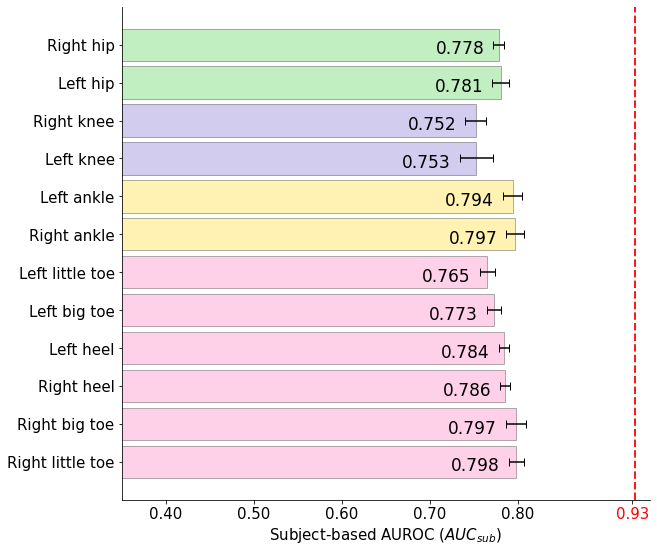

In [129]:
#Plotting Task and Subject gen PI side-by-side 
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
font = {'size'   : 15}
mpl.rc('font', **font)


fig, axes = plt.subplots(1, 1, sharex=False, sharey = False, figsize=(9, 7.5), constrained_layout=True)
# fig.tight_layout()
# sns.despine(offset=0)

'''
#Bar plot for the Task-Gen
sns.barplot(x = task_gen_metric, y = task_gen_pi_df.index, palette= task_gen_pi_df['colors'], linewidth = 0.5, \
                 edgecolor = 'k', ax = axes, xerr = task_gen_pi_df['std']*1, \
            ecolor = 'grey', capstyle='projecting', data=task_gen_pi_df, alpha = 0.6)
#palette= colors_sorted, #use for colored plot
'''

plt.barh(width = cross_gen_pi_df[cross_gen_metric], height = 0.85, data = cross_gen_pi_df, linewidth = 1, \
                 edgecolor = 'k', alpha = 0.3, \
           xerr = cross_gen_pi_df['std'], capsize = 4, label = 'Cross-Gen',  y= np.array(range(len(cross_gen_pi_df.index))))


#Sorting the feature display names by the order of appearance on the plot
feature_display_names_sorted = [feature_dic[x] for x in cross_gen_pi_df.index]

#Assigning the grouped color and hatch for separating between task and subject gen results 
for i, bar in enumerate(axes.patches):
    bar.set_facecolor(cross_gen_pi_df['colors'][i])
    bar.set_edgecolor = 'k'
        
#Adding the metric of interest as text to the plot
for idx, p in enumerate(axes.patches):
    axes.annotate("%.3f" % p.get_width(), \
                     (p.get_x() + p.get_width()- cross_gen_pi_df['std'][idx]-0.018, p.get_y()-0.08),
                xytext=(7, 10), textcoords='offset points', ha = 'right', fontsize = 17)
fig.texts.append(axes.texts.pop())    
    
axes.set_yticks(np.arange(12))
axes.set_yticklabels(feature_display_names_sorted, fontsize = 15)
axes.set_ylim(-1,12)
axes.set_xlim(0.35, 0.95)
axes.set_xticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.93])
plt.gca().get_xticklabels()[5].set_color('red')
axes.set_xlabel(cross_gen_metric_display_name, fontsize = 15)

# axes.set_title('Task-Gen', fontsize = 13)

#Adding a line showing the best Task-Gen metric in best regress-N model
axes.axvline(x=0.933, color = 'red', alpha = 0.9, linestyle = '--', linewidth = 2)
# axes.set_xticks(list(axes.get_xticks()) + [0.93])

# plt.title('Feature permutation importance')
# plt.savefig('side_by_side.png', dpi = 250, bbox_inches='tight')
plt.savefig('C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\PermImpResults\\WtoWT\\PI_cross_gen_' + str(cross_gen_metric) + '.png', dpi = 250, bbox_inches='tight')
plt.show()

In [96]:
axes.get_xticks()

array([0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.  , 0.93])